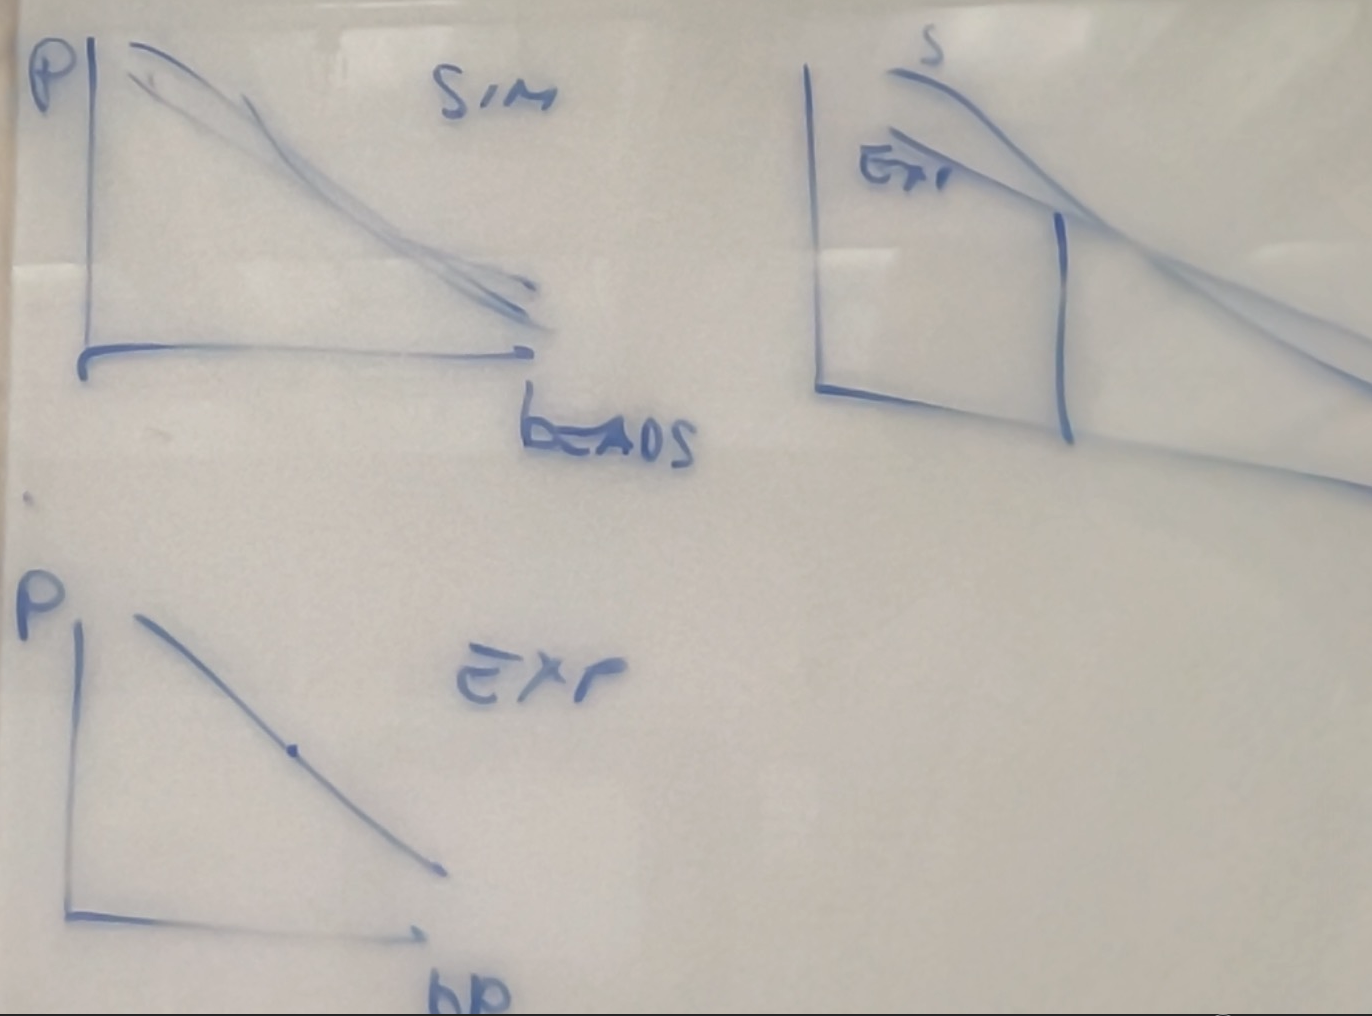

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
# CIS===========================================================

# Load experimental data
# Average normalized Hi-C contact probability vs genomic distance (in kilobases)
P_cis_experiment = np.loadtxt('/Users/douglas/Documents/Features Transfer/figures/chr2_1kbRes_cis_P_vs_d.txt')# Average experimental contact probability versus genomic distance. First 100kb included. 

# Load simulation data
# Simulation 2 has only homopolymer potentials, type sequences AAAA AAAA, and tight pairing.
P_cis_simulation_1 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_1.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_2 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_2.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_8 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_8.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_9 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_9.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_10 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_10.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_11 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_11.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_12 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_12.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_13 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_13.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_20 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_20.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_21 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_21.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_22 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_22.txt') # Average cis contact probability vs genomic distance (in beads)
P_cis_simulation_23 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/PvsGenomic_directory_23.txt') # Average cis contact probability vs genomic distance (in beads)


# TRANS===========================================================

# Load experimental data
# Average normalized trans Hi-C contact probability vs genomic distance (in kilobases)
P_trans_experiment = np.loadtxt('/Users/douglas/Documents/Features Transfer/figures/chr2_1kbRes_trans_P_vs_d.txt')# Average experimental contact probability versus genomic distance. First 100kb included. 

# Load simulation data
# Simulation 2 has only homopolymer potentials, type sequences AAAA AAAA, and tight pairing.
P_trans_simulation_2 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/transPvsGenomic_directory_2.txt') # Average trans contact probability vs genomic distance (in beads)
P_trans_simulation_9 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/transPvsGenomic_directory_9.txt') # Average trans contact probability vs genomic distance (in beads)
P_trans_simulation_11 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/transPvsGenomic_directory_11.txt') # Average trans contact probability vs genomic distance (in beads)
P_trans_simulation_13 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/transPvsGenomic_directory_13.txt') # Average trans contact probability vs genomic distance (in beads)
P_trans_simulation_21 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/transPvsGenomic_directory_21.txt') # Average trans contact probability vs genomic distance (in beads)
P_trans_simulation_22 = np.loadtxt('/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/transPvsGenomic_directory_22.txt') # Average trans contact probability vs genomic distance (in beads)

# GENOMIC DISTANCE ARRAYS===========================================================

# Make experimental genomic distance array (1kb = 1 entry)
d_experiment_20000kb = np.arange(0,20000) # 0, 1, ..., 19999

# Make simulation genomic distance distance array (1 bead = 1 entry)
d_simulation_2500beads = np.arange(0,2500) # 0, 1, ..., 2499

(4, 400)

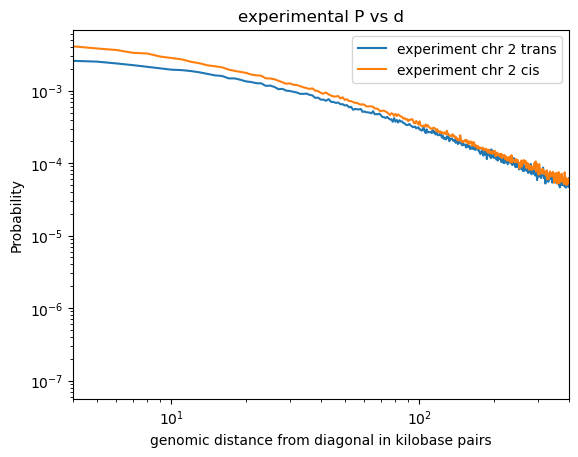

In [3]:
# Double check plot experimental trans and cis (maternal) diagonal for chromosome 2

#plot
plt.plot(d_experiment_20000kb, P_trans_experiment, label='experiment chr 2 trans')
plt.plot(d_experiment_20000kb, P_cis_experiment, label='experiment chr 2 cis')

# Plot settings
plt.title('experimental P vs d')
plt.legend()
plt.xlabel('genomic distance from diagonal in kilobase pairs')
plt.xscale('log')
plt.ylabel('Probability')
plt.yscale('log')
plt.xlim(4,400)

(20000.0, 32813963.782406352)

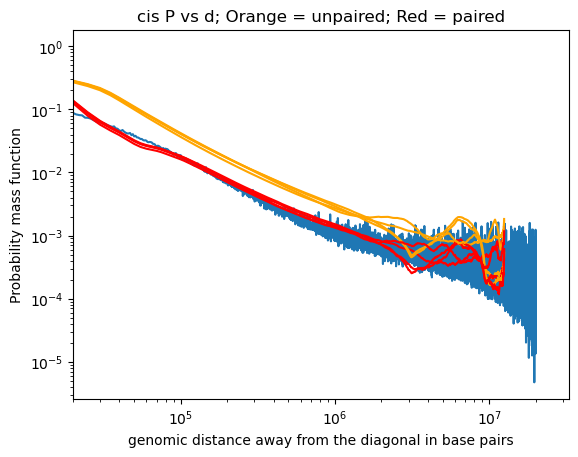

In [7]:
# CIS
# Plot average normalized cis Hi-C contact probability vs genomic distance (in kilobases)

# Plot cis experimental data
bin_size = 1000 # base pairs
plt.plot(bin_size*d_experiment_20000kb, 50*P_cis_experiment, label='experiment chr 2 cis')

# Plot cis simulation data
bead_size = 5000 # in base pairs; tune to line up the pmfs.
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_1, label='simulation_1 cis', color='orange')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_2, label='simulation_2 cis', color='red')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_8, label='simulation_8 cis', color='orange')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_9, label='simulation_9 cis', color='red')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_10, label='simulation_10 cis', color='orange')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_11, label='simulation_11 cis', color='red')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_12, label='simulation_12 cis', color='orange')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_13, label='simulation_13 cis', color='red')

# Plot settings
plt.title('cis P vs d; Orange = unpaired; Red = paired')
#plt.legend()
plt.xlabel('genomic distance away from the diagonal in base pairs')
plt.xscale('log')
plt.ylabel('Probability mass function')
plt.yscale('log')
plt.xlim(2e4)

(20000.0, 33971145.71612659)

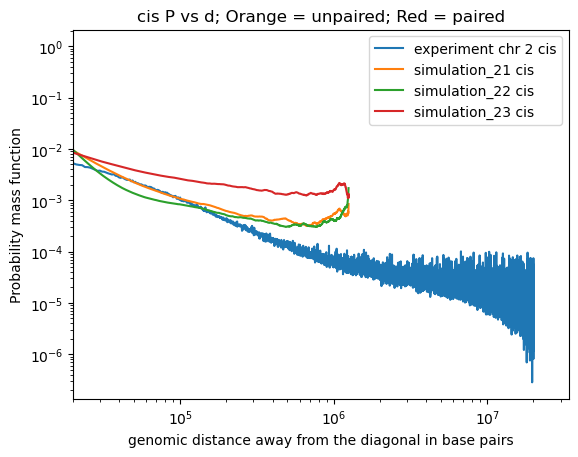

In [24]:
# CIS directories 21, 22, and 23
# Plot average normalized cis Hi-C contact probability vs genomic distance (in kilobases)

# Plot cis experimental data
bin_size = 1000 # base pairs
plt.plot(bin_size*d_experiment_20000kb, 3*P_cis_experiment, label='experiment chr 2 cis')

# Plot cis simulation data
bead_size = 500# in base pairs; tune to line up the pmfs.
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_21, label='simulation_21 cis')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_22, label='simulation_22 cis')
plt.plot(bead_size*d_simulation_2500beads, P_cis_simulation_23, label='simulation_23 cis')

# Plot settings
plt.title('cis P vs d; Orange = unpaired; Red = paired')
plt.legend()
plt.xlabel('genomic distance away from the diagonal in base pairs')
plt.xscale('log')
plt.ylabel('Probability mass function')
plt.yscale('log')
plt.xlim(2e4)

(20000.0, 32813963.782406352)

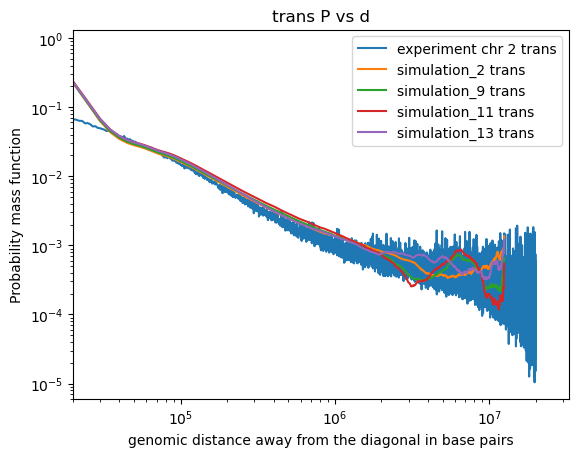

In [6]:
# TRANS
# Plot average normalized trans Hi-C contact probability vs genomic distance (in kilobases)

# Plot trans experimental data
bin_size = 1000 # base pairs (fixed by data)
plt.plot(bin_size*d_experiment_20000kb, 50*P_trans_experiment, label='experiment chr 2 trans')

# Plot trans simulation data
bead_size = 5000 # in base pairs; tune to line up the pmfs.
plt.plot(bead_size*d_simulation_2500beads, P_trans_simulation_2, label='simulation_2 trans')
plt.plot(bead_size*d_simulation_2500beads, P_trans_simulation_9, label='simulation_9 trans')
plt.plot(bead_size*d_simulation_2500beads, P_trans_simulation_11, label='simulation_11 trans')
plt.plot(bead_size*d_simulation_2500beads, P_trans_simulation_13, label='simulation_13 trans')

# Plot settings
plt.title('trans P vs d')
plt.legend()
plt.xlabel('genomic distance away from the diagonal in base pairs')
plt.xscale('log')
plt.ylabel('Probability mass function')
plt.yscale('log')
plt.xlim(2e4,)